<a href="https://colab.research.google.com/github/sjunc/2025-ML/blob/main/class/DAY5_ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5주차

In [10]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [13]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 붓꽃 데이터 분류 SVC

In [2]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)


array([ True, False])

In [5]:
# 예측하는데 사용한 점수
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

## 비선형 데이터

In [21]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.55, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)




/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=100, dual=True, max_iter=10000, random_state=42))])

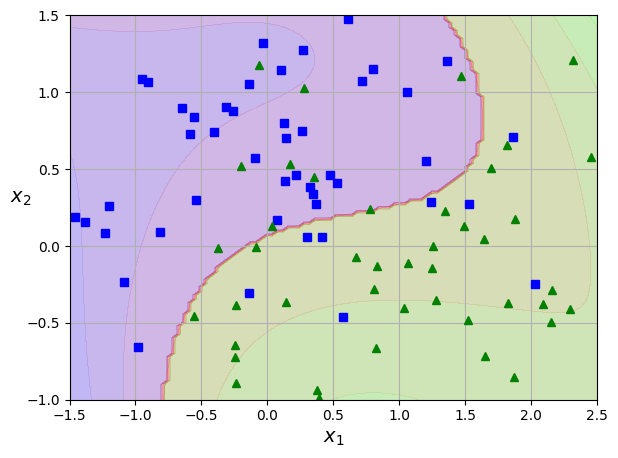

In [22]:
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## 실습 FIFA 선수 능력치

In [23]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [25]:
# 데이터를 수집합니다.
df = pd.read_csv('fifa_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [27]:
df1 = pd.DataFrame({'Name': df.Name, 'Club': df.Club, 'Position': df.Position,})
df2 = df.iloc[:,54: 88].astype(float)

td = pd.concat([df1, df2], axis=1)
td

,Name,Club,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,FC Barcelona,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,Juventus,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,Paris Saint-Germain,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,Manchester United,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,Manchester City,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,Trelleborgs FF,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,Cambridge United,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,Tranmere Rovers,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [28]:
tmp = td.columns

In [31]:
del td[tmp[10]]
del td[tmp[11]]
del td[tmp[15]]
del td[tmp[16]]
del td[tmp[17]]
del td[tmp[18]]
del td[tmp[19]]
del td[tmp[20]]
del td[tmp[21]]
del td[tmp[22]]
del td[tmp[23]]
del td[tmp[28]]
td.columns

Index(['Name', 'Club', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [32]:
# 포지션별 개수 확인
td.Position.value_counts()

,count
Position,
ST,2152
GK,2025
CB,1778
CM,1394
LB,1322
RB,1291
RM,1124
LM,1095
CAM,958


In [34]:
# 비슷한 역할 합치기 시험: 이걸 왜하나?, 분석에 쓰지 못할 데이터를 거르시오. 답 value_count 해서 없애거나 합침.
td.loc[td['Position'] == 'LF', ['Position']] = 'ST'
td.loc[td['Position'] == 'RF', ['Position']] = 'ST'
td.loc[td['Position'] == 'CF', ['Position']] = 'ST'
td.loc[td['Position'] == 'LS', ['Position']] = 'ST'
td.loc[td['Position'] == 'RS', ['Position']] = 'ST'
td.loc[td['Position'] == 'LAM', ['Position']] = 'CAM'
td.loc[td['Position'] == 'RAM', ['Position']] = 'CAM'
td.loc[td['Position'] == 'RCM', ['Position']] = 'CM'
td.loc[td['Position'] == 'LCM', ['Position']] = 'CM'
td.loc[td['Position'] == 'LDM', ['Position']] = 'CDM'
td.loc[td['Position'] == 'RDM', ['Position']] = 'CDM'
td.loc[td['Position'] == 'LW', ['Position']] = 'WF'
td.loc[td['Position'] == 'RW', ['Position']] = 'WF'
td.loc[td['Position'] == 'LB', ['Position']] = 'WB'
td.loc[td['Position'] == 'RB', ['Position']] = 'WB'
td.loc[td['Position'] == 'LWB', ['Position']] = 'WB'
td.loc[td['Position'] == 'RWB', ['Position']] = 'WB'
td.loc[td['Position'] == 'LM', ['Position']] = 'WM'
td.loc[td['Position'] == 'RM', ['Position']] = 'WM'
td.loc[td['Position'] == 'LCB', ['Position']] = 'CB'
td.loc[td['Position'] == 'RCB', ['Position']] = 'CB'


In [35]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(td, test_size = 0.2)

train.shape[0]

14565

In [36]:
test.shape

(3642, 24)

In [39]:
#저장
with open('train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)
with open('test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

In [40]:
#불러오기
with open('train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
with open('test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

In [51]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                          {'kernel':['rbf'],
                           'gamma': [0.1 , 1],
                           'C': [1, 10]}
              ]
print(svm_parameters)
clf = GridSearchCV(SVC(), svm_parameters, cv = nfolds)
#clf = SVC (kernel = "rbf", gamma = 0.0001, C =10)
clf.fit(X, y)
print(clf.best_params_)

return clf


NameError: name 'svm_parameters' is not defined

In [52]:
X_train = train.iloc[:, 3:24]
y_train = train[['Position']]

clf = svc_param_selection(X_train, y_train.values.ravel(), 10)